# DEPENDANCIES

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
sns.set()
from sklearn.utils.multiclass import unique_labels
from sklearn.decomposition import PCA 
from sklearn.manifold import Isomap
from sklearn import datasets

# FUNCTIONS

In [2]:
def label_encoding(dataset,input_headers):
    
    for i in input_headers:
        
        the_data_type=dataset[i].dtype.name
        if (the_data_type=='object'):
            lable_enc=preprocessing.LabelEncoder()
            lable_enc.fit(dataset[i])
            labels=lable_enc.classes_   #this is an array
            labels=list(labels) #converting the labels array to a list
            print(labels)
            dataset[i]=lable_enc.transform(dataset[i])

            return labels
    
        else:
            return list(np.unique(dataset[i]))
    

In [3]:
def replacing_zeros(dataset,the_headers):
    """Function used to remove zeros from numeric features when 0 is not practical"""

    for header in the_headers:
        dataset[header]=dataset[header].replace(0,np.nan)
        mean=int(dataset[header].mean(skipna=True))
        dataset[header]=dataset[header].replace(np.nan,mean)
        
    return dataset

In [ ]:
def feature_distributions(df,target_header):
    
    data=df.drop(target_header,axis=1,inplace=False)
    
    label_encoder = preprocessing.LabelEncoder()
    df[target_header]=label_encoder.fit_transform(df[target_header])
    labels=label_encoder.classes_   #this is an array
    labels=list(labels) #converting the labels array to a list
    print (labels)
    
#     print(df[target_header])
    
    fig = plt.figure(figsize = (20, 25))
    j = 0
    for i in data.columns:
        plt.subplot(4, 4, j+1)
        j += 1
        sns.distplot(data[i][df[target_header]==0], color='g', label = '0')
        sns.distplot(data[i][df[target_header]==1], color='r', label = '1')
        sns.distplot(data[i][df[target_header]==2], color='b', label = '2')
        plt.legend(loc='best')
    fig.suptitle(target_header+ 'Data Analysis')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.show()

In [4]:
def feature_distributions(df,target_header):
    
    data=df.drop(target_header,axis=1,inplace=False)

    num_plot_rows=len(data.columns)


    label_encoder = preprocessing.LabelEncoder()
    df[target_header]=label_encoder.fit_transform(df[target_header])
    labels=label_encoder.classes_   #this is an array
    labels=list(labels) #converting the labels array to a list
    print (labels)

    fig = plt.figure(figsize = (20,num_plot_rows*4))
    j = 0

    ax=[]
    colors=['b','r','g']
    for i in data.columns:
        plt.subplot(num_plot_rows, 4, j+1)
        j += 1
        for k in range(len(labels)):
    #         print(k)
            a=sns.distplot(data[i][df[target_header]==k], color=colors[k], label = str(labels[k]));
            ax.append(a)
        plt.legend(loc='best')
    fig.suptitle(target_header+ 'Data Analysis')
    fig.tight_layout()
    # fig.subplots_adjust(top=0.95)
    plt.show()

# METHODS

## Iris Dataset and pairplot

In [5]:

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
target_header='species'

### pairplot

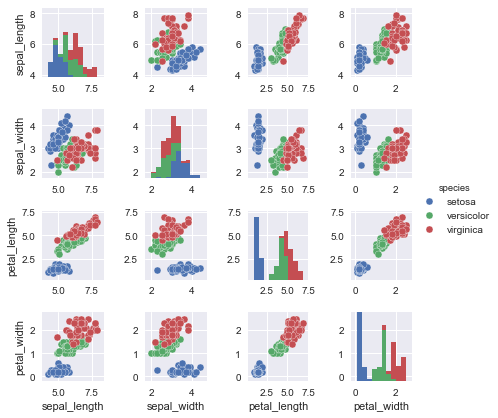

In [8]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

### Correlation matrix

In [9]:
corr=iris.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


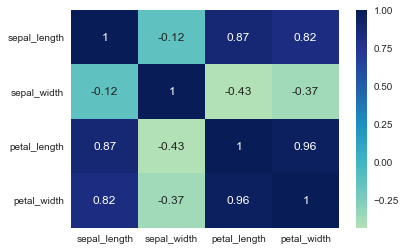

In [10]:
sns.heatmap(corr,cmap="YlGnBu",annot=True,center=0)

['setosa', 'versicolor', 'virginica']


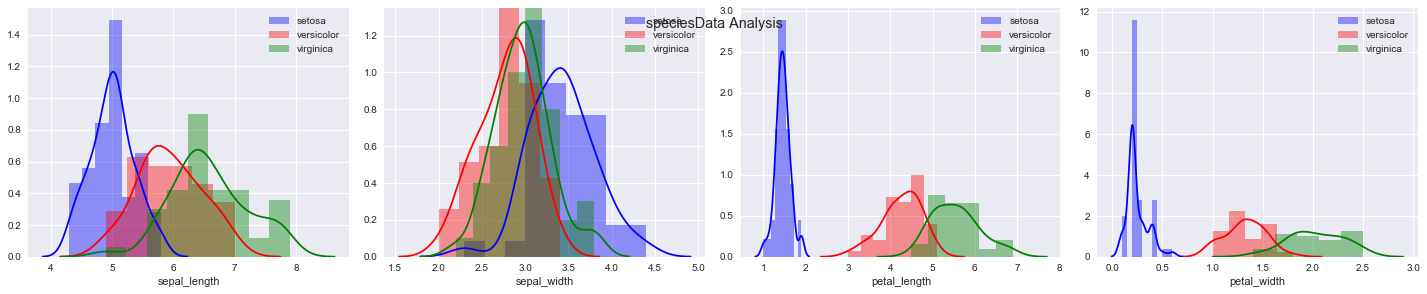

In [11]:
feature_distributions(iris,target_header)

## Linear reqression on random generated dataset

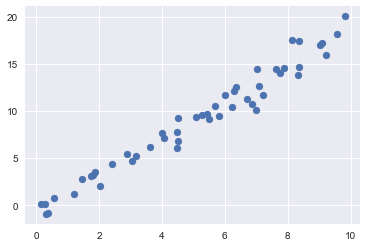

In [12]:


rng = np.random.RandomState(40)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [13]:
x

array([4.07687028, 0.5536604 , 7.88534877, 2.87305185, 4.50350587,
       3.03912305, 5.26399524, 6.23812213, 7.76775458, 6.86241645,
       9.80938863, 6.00816092, 8.1396852 , 7.08645152, 0.2753468 ,
       9.04267217, 4.49904851, 1.18924654, 8.35300176, 2.02248226,
       1.74202671, 4.4914708 , 6.69794781, 9.57399109, 8.33333251,
       5.08309965, 6.30023548, 8.35034686, 4.47331645, 7.62290474,
       6.36922242, 3.62295894, 0.14574549, 5.41984891, 3.18155481,
       1.44990347, 5.48891947, 1.87481273, 3.98981476, 2.40038207,
       0.36654853, 5.68544757, 9.22764799, 1.79055106, 7.03077668,
       7.20012795, 0.31064019, 5.82825307, 6.97677596, 9.09853468])

In [14]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [15]:
X[0:5]

array([[4.07687028],
       [0.5536604 ],
       [7.88534877],
       [2.87305185],
       [4.50350587]])

In [16]:
y

array([ 7.16272997,  0.74842355, 14.59299039,  5.44238131,  6.81828664,
        4.74654925,  9.55806662, 10.36832909, 13.98558426, 10.69192335,
       20.02669507, 11.64943011, 17.49211728, 12.64630076,  0.09357529,
       17.00086464,  9.29011204,  1.20178251, 17.39379067,  1.99835098,
        3.12617362,  7.80997986, 11.28383064, 18.1272794 , 13.85314324,
        9.36972119, 12.132345  , 14.68367026,  6.09858236, 14.41835856,
       12.52464638,  6.17444785,  0.12783976,  9.64146893,  5.27083706,
        2.77053282,  9.13864647,  3.57288084,  7.68138189,  4.39912464,
       -0.77489792, 10.50703326, 15.96318139,  3.19276765, 14.43108095,
       11.69752448, -0.8975006 ,  9.42180291, 10.07255732, 17.18134607])

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
model.coef_

array([1.93833995])

In [21]:
model.intercept_

-0.7912709669952651

In [22]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [23]:
xfit=np.linspace(-1,11)

In [24]:
xfit[0:10]

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163])

In [25]:
xfit=xfit[:,np.newaxis]

In [26]:
yfit=model.predict(xfit)

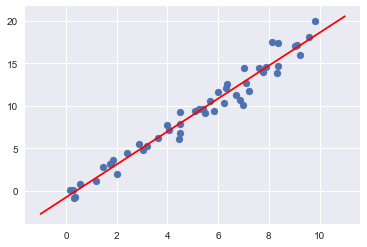

In [27]:
plt.scatter(X,y)
plt.plot(xfit,yfit, color='r')

## dataset A PCA & Cluster

In [28]:
X_iris=iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [29]:
y_iris=iris['species']
y_iris.shape

(150,)

In [30]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

C:\Users\Public\Programming\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

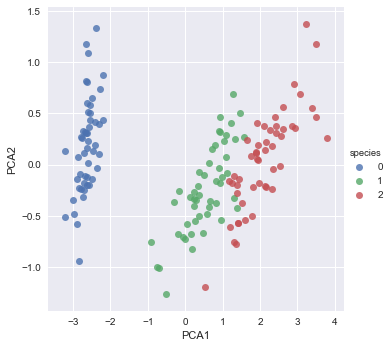

In [32]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In [33]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,-2.728717,0.326755


In [34]:
from sklearn.mixture import GMM      # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

C:\Users\Public\Programming\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Public\Programming\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Public\Programming\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Public\Programming\lib\site-packages\sklearn\utils\deprecation.py:77: Deprecation

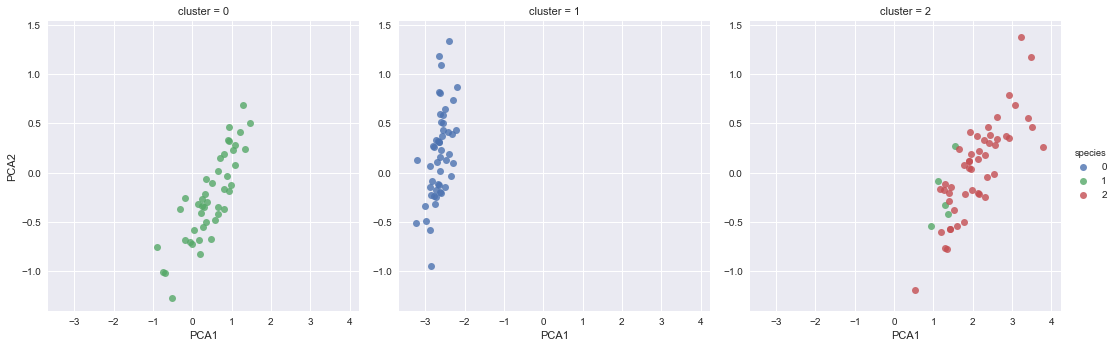

In [35]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

In [36]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,0,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,0,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,0,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,0,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,0,-2.728717,0.326755,1


## dataset B  PCA & Cluster

In [37]:
import pandas as pd
# location=r'C:\Users\96015\Desktop\Jim_Python_Code\Data Science\Data Sets\KidCreative.csv'
# location=r'C:\Users\96015\Desktop\Jim_Python_Code\Datasets\CDH_Test.csv'


In [38]:
# df=pd.read_csv(location)

In [39]:
# df=sns.load_dataset('mpg')
df=sns.load_dataset('titanic')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [41]:
# df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
# df.info()

In [42]:
# z=df.drop(labels=['deck','alive'], axis=1, index=None, columns=None, level=None, inplace=False)
# z.head()

In [43]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
df.loc[df['age'].isnull()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True


In [45]:
df.loc[df['embarked'].isnull()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [46]:
mean=int(df['age'].mean(skipna=True))
df['age']=df['age'].replace(np.nan,mean)

In [47]:
df['embarked']=df['embarked'].replace(np.nan,'U')
df['embark_town']=df['embark_town'].replace(np.nan,'U')

In [48]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
X_data=df.drop(['alive','deck','adult_male','who','class','embark_town'],axis=1,inplace=False)

In [50]:
target_header=['sex','embarked','alone']
target_label=label_encoding(X_data,target_header)

['female', 'male']


In [51]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [52]:
# X_data=df
# type(X_data)
X_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,S,False
1,1,1,0,38.0,1,0,71.2833,C,False
2,1,3,0,26.0,0,0,7.9250,S,True
3,1,1,0,35.0,1,0,53.1000,S,False
4,0,3,1,35.0,0,0,8.0500,S,True


In [53]:
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_data)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_data)         # 4. Transform the data to two dimensions

ValueError: could not convert string to float: 'Q'

In [ ]:
X_2D

In [ ]:
df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='alive', data=df, fit_reg=False);

In [ ]:
df['alive'].value_counts(normalize=False)

In [ ]:
df.head()

In [ ]:
from sklearn.mixture import GMM      # 1. Choose the model class
model = GMM(n_components=4,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_data)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_data)        # 4. Determine cluster labels

In [ ]:
feature='alive'
df['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=df, hue=feature,
           col='cluster', fit_reg=False);

In [ ]:
target_header=['sex','class','who','embarked','adult_male','embark_town','alone','alive']
target_label=label_encoding(df,target_header)

In [ ]:
df.drop(['deck'],axis=1,inplace=True)

In [ ]:
df.head(10)

In [ ]:
headers=df.columns.tolist()

In [ ]:
headers[0:-3]

In [ ]:
for i in headers[0:-3]:
    print(i,'\n',df.groupby('cluster')[i].agg(['count','mean', 'median']), '\n')

In [ ]:
df.groupby('alive')['alone'].agg(['count', 'mean'])

In [ ]:
df.groupby('cluster')['alive'].agg(['count', 'mean'])

In [ ]:
df.groupby(['sex', 'pclass'])['survived'].aggregate('count').unstack()

In [ ]:
df.groupby(['sex', 'pclass'])['cluster'].mean()

In [ ]:
df.pivot_table('sex',index='cluster',columns='pclass',aggfunc='mean')

In [ ]:
age = pd.cut(df['age'], [0, 18, 80])
df.pivot_table('survived', ['cluster', age], 'pclass',aggfunc='count')

In [ ]:
df.pivot_table('cluster',index=['sex'],columns='pclass',aggfunc='count')

In [ ]:
iso = Isomap(n_components=2)
iso.fit(X_data)
data_projected = iso.transform(X_data)
data_projected.shape

In [ ]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=df.origin,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 3))
plt.colorbar(label='digit label', ticks=range(3))
# plt.clim(-0.5, 9.5)
plt.show()

# GENERATE CLASSIFICATION DATASET 

## Functions

In [54]:
def the_gmm(df,X_data, target_header):
    
#     model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
#     model.fit(X_data)                      # 3. Fit to data. Notice y is not specified!
#     X_2D = model.transform(X_data)         # 4. Transform the data to two dimensions
    
    
#     df['PCA1'] = X_2D[:, 0]
#     df['PCA2'] = X_2D[:, 1]

#     sns.lmplot("PCA1", "PCA2", hue=target_header, data=df, fit_reg=False);

    from sklearn.mixture import GMM      # 1. Choose the model class
    model = GMM(n_components=4,
                covariance_type='full')  # 2. Instantiate the model with hyperparameters
    model.fit(X_data)                    # 3. Fit to data. Notice y is not specified!
    y_gmm = model.predict(X_data)        # 4. Determine cluster labels
    
    feature=target_header

    sns.lmplot("PCA1", "PCA2", data=df, hue=feature,
           col='cluster', fit_reg=False);
    
    
    return y_gmm
    
    

## Retrieve Dataset

### Array to dataframe option

In [ ]:
X, y = datasets.make_classification(n_samples=1000, n_features=5, n_informative=2,
                                     n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, 
                                     weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0,
                                     scale=1.0, shuffle=True, random_state=None)

In [378]:
c=datasets.load_breast_cancer()
# c=datasets.load_wine()
X=c.data
y=c.target
target_name=c.target_names
feature_name=c.feature_names
target_header='diag'

In [ ]:
print(X[0:2])
print(y[0:2])

In [ ]:
print(target_name)
print(feature_name)

In [381]:
y=y.reshape(y.size,1)

In [382]:
X = np.append(X, y, axis = 1)

In [383]:
# header_names=['A','B','C','D','E','Target']
header=list(feature_name)
header.append(target_header)

In [ ]:
header

In [385]:

df=pd.DataFrame(data=X, index=None, columns=header, dtype=None, copy=False)

### Dataframe direct option

In [55]:
# location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/heart-disease-uci/heart.csv'
location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/0529_/0529_pass_rush.csv'
# location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/stock/stock_data.csv'
df=pd.read_csv(location)


In [56]:
df.columns

Index(['play_id', 'game_id', 'home_team', 'away_team', 'posteam',
       'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive', 'sp',
       'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 'ydsnet',
       'desc', 'play_type', 'yards_gained', 'pass_length', 'pass_location',
       'air_yards', 'yards_after_catch', 'run_location', 'run_gap',
       'two_point_conv_result', 'home_timeouts_remaining',
       'away_timeouts_remaining', 'td_team', 'total_home_score',
       'total_away_score', 'posteam_score', 'defteam_score',
       'score_differential', 'score_differential_post', 'no_score_prob',
       'two_point_conversion_prob', 'first_down_rush', 'first_down_pass',
       'first_down_penalty', 'third_down_converted', 'third_down_failed',
       'fourth_down_converted', 'fourth_down_failed', 'incomplete_pass',
       'interceptio

In [57]:
target_header='play_type'
column_name=[target_header]

In [58]:
# df.drop(labels=['Date','Stop_Loss','GL_MA_Money','GL_MA_%','DR_above_DRma'],axis=1,inplace=True)
df=df[ [ 'ydstogo','score_differential_post','down','qtr','game_half','play_type']]

In [1984]:
df['game_seconds_remaining'] = df['game_seconds_remaining'].apply(lambda x: x/3600)

In [2070]:
game_half_dum=pd.get_dummies(df.game_half,prefix='game_half').iloc[:,0:2]
df.drop(labels='game_half',axis=1,inplace=True)
df=pd.concat([df,game_half_dum],axis=1)

In [59]:
df.head()

,ydstogo,score_differential_post,down,qtr,game_half,play_type
0,10,0.0,1.0,1,Half1,pass
1,5,0.0,2.0,1,Half1,run
2,8,0.0,3.0,1,Half1,pass
3,10,0.0,1.0,1,Half1,run
4,10,0.0,2.0,1,Half1,pass


In [60]:
df=pd.get_dummies(df,columns=['game_half'],drop_first=True);

In [61]:
df.head()

,ydstogo,score_differential_post,down,qtr,play_type,game_half_Half2,game_half_Overtime
0,10,0.0,1.0,1,pass,0,0
1,5,0.0,2.0,1,run,0,0
2,8,0.0,3.0,1,pass,0,0
3,10,0.0,1.0,1,run,0,0
4,10,0.0,2.0,1,pass,0,0


In [62]:
target_label=label_encoding(df,column_name)

['pass', 'run']


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7096 entries, 0 to 7095
Data columns (total 7 columns):
ydstogo                    7096 non-null int64
score_differential_post    7096 non-null float64
down                       7096 non-null float64
qtr                        7096 non-null int64
play_type                  7096 non-null int64
game_half_Half2            7096 non-null uint8
game_half_Overtime         7096 non-null uint8
dtypes: float64(2), int64(3), uint8(2)
memory usage: 291.1 KB


In [64]:
df[target_header]=df[target_header].astype('int64');

In [65]:
df.head()

,ydstogo,score_differential_post,down,qtr,play_type,game_half_Half2,game_half_Overtime
0,10,0.0,1.0,1,0,0,0
1,5,0.0,2.0,1,1,0,0
2,8,0.0,3.0,1,0,0,0
3,10,0.0,1.0,1,1,0,0
4,10,0.0,2.0,1,0,0,0


In [66]:
header=list(df.columns)
# header.pop()
header.remove(target_header)

In [67]:
df[header].head()

,ydstogo,score_differential_post,down,qtr,game_half_Half2,game_half_Overtime
0,10,0.0,1.0,1,0,0
1,5,0.0,2.0,1,0,0
2,8,0.0,3.0,1,0,0
3,10,0.0,1.0,1,0,0
4,10,0.0,2.0,1,0,0


In [ ]:
target_header='diag'

df.drop(labels=['Target'], axis=1, level=None, inplace=True, errors='raise')

In [68]:
# feature_matrix=df[['A','B','C','D','E']]
feature_matrix=df[header]

## Correlation Matrix

In [69]:
corr=feature_matrix.corr()
corr

,ydstogo,score_differential_post,down,qtr,game_half_Half2,game_half_Overtime
ydstogo,1.000000,-0.042026,-0.326303,-0.004791,-0.005769,0.005319
score_differential_post,-0.042026,1.000000,-0.012200,-0.048026,-0.033365,0.005891
down,-0.326303,-0.012200,1.000000,0.046444,0.036201,0.006045
qtr,-0.004791,-0.048026,0.046444,1.000000,0.862288,0.179752
game_half_Half2,-0.005769,-0.033365,0.036201,0.862288,1.000000,-0.080913
game_half_Overtime,0.005319,0.005891,0.006045,0.179752,-0.080913,1.000000


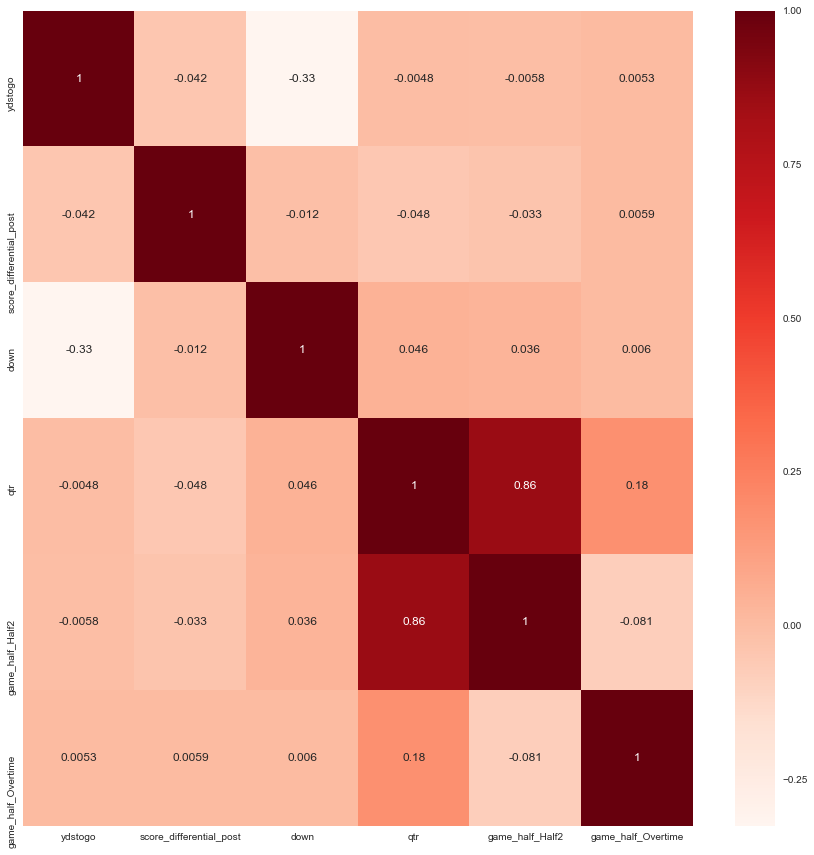

In [70]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap="Reds",annot=True)

In [ ]:
%matplotlib inline
sns.set()
sns.pairplot(df, hue=target_header, size=1.5);

## Feature Distributions (against target)

[0, 1]


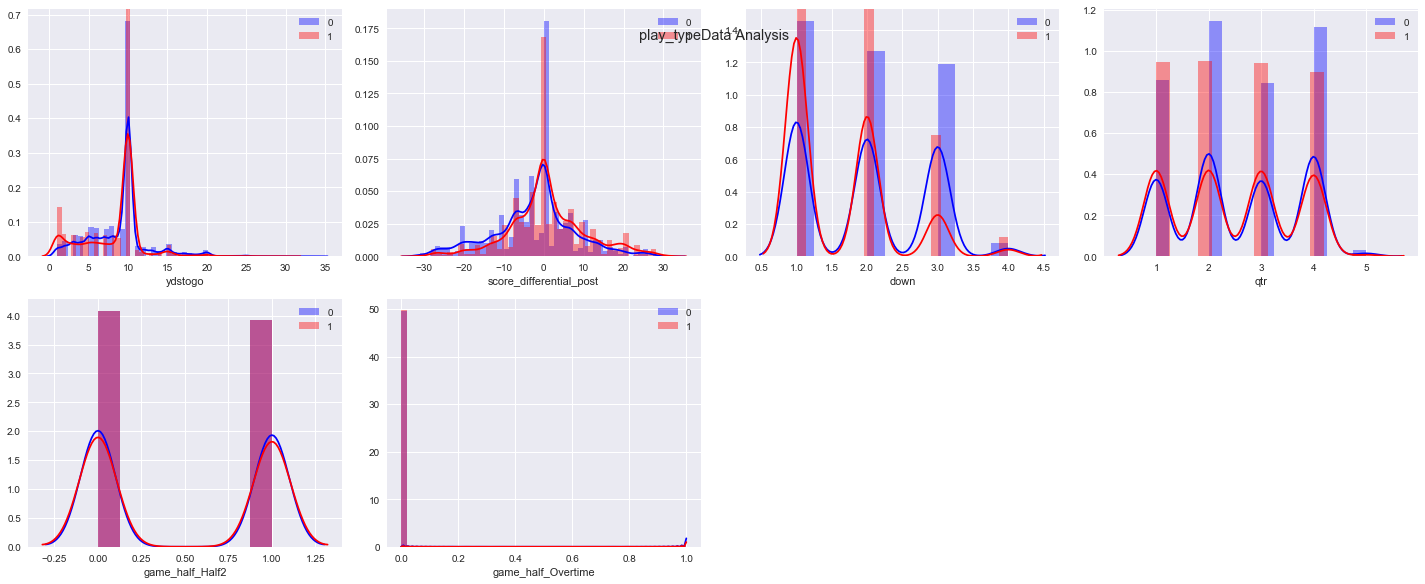

In [71]:
feature_distributions(df,target_header)

## Principle Component Analysis (PCA)

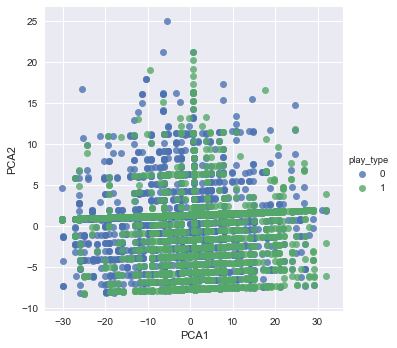

In [72]:
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(feature_matrix)  # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(feature_matrix)         # 4. Transform the data to two dimensions


df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue=target_header, data=df, fit_reg=False);

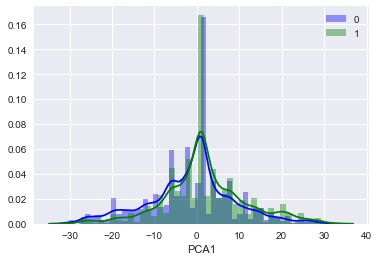

In [73]:
sns.distplot(df['PCA1'][df[target_header]==0], color='b', label = '0')
sns.distplot(df['PCA1'][df[target_header]==1], color='g', label = '1')
# sns.distplot(df['PCA1'][df[target_header]==2], color='r', label = '2')
plt.legend(loc='best')

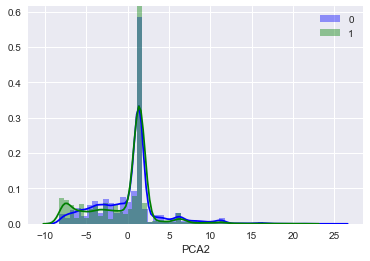

In [74]:
sns.distplot(df['PCA2'][df[target_header]==0], color='b', label = '0')
sns.distplot(df['PCA2'][df[target_header]==1], color='g', label = '1')
# sns.distplot(df['PCA2'][df[target_header]==2], color='r', label = '2')
plt.legend(loc='best')

In [75]:
df.ndim

2

In [76]:
number_of_clusters=5

## Gaussian Mixture Model 

In [77]:
# df['cluster']=the_gmm(feature_matrix,target_header,feature_matrix)

C:\Users\Public\Programming\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Public\Programming\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Public\Programming\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Public\Programming\lib\site-packages\sklearn\utils\deprecation.py:77: Deprecation

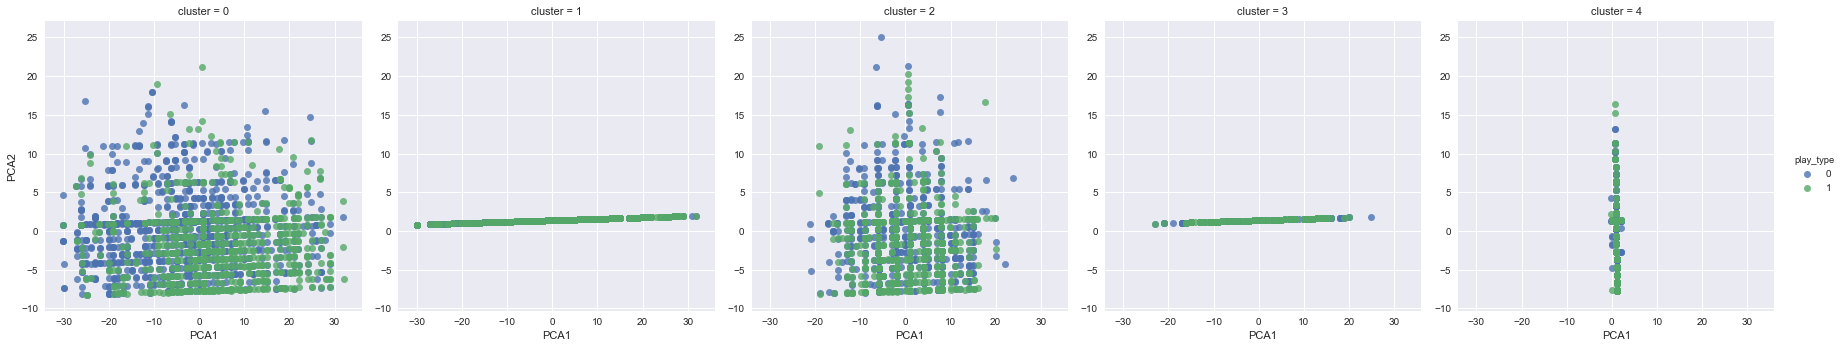

In [78]:
from sklearn.mixture import GMM      # 1. Choose the model class
model = GMM(n_components=number_of_clusters,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(feature_matrix)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(feature_matrix)        # 4. Determine cluster labels

df['cluster']=y_gmm
feature=target_header

sns.lmplot("PCA1", "PCA2", data=df, hue=feature,
       col='cluster', fit_reg=False);
    

In [79]:
df.head()

,ydstogo,score_differential_post,down,qtr,play_type,game_half_Half2,game_half_Overtime,PCA1,PCA2,cluster
0,10,0.0,1.0,1,0,0,0,0.941895,1.411113,3
1,5,0.0,2.0,1,1,0,0,1.034309,-3.647812,4
2,8,0.0,3.0,1,0,0,0,0.977557,-0.729622,4
3,10,0.0,1.0,1,1,0,0,0.941895,1.411113,3
4,10,0.0,2.0,1,0,0,0,0.941080,1.337885,4


## K-Means

In [80]:
from sklearn.cluster import KMeans

In [81]:
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
kmeans.fit(df[['PCA1','PCA2']])
y_means=kmeans.predict(df[['PCA1','PCA2']])
kmeans.labels_


array([0, 0, 0, ..., 1, 1, 1])

In [82]:
df['k-clusters']=y_means

In [83]:
df.head()

,ydstogo,score_differential_post,down,qtr,play_type,game_half_Half2,game_half_Overtime,PCA1,PCA2,cluster,k-clusters
0,10,0.0,1.0,1,0,0,0,0.941895,1.411113,3,0
1,5,0.0,2.0,1,1,0,0,1.034309,-3.647812,4,0
2,8,0.0,3.0,1,0,0,0,0.977557,-0.729622,4,0
3,10,0.0,1.0,1,1,0,0,0.941895,1.411113,3,0
4,10,0.0,2.0,1,0,0,0,0.941080,1.337885,4,0


In [84]:
centers=kmeans.cluster_centers_

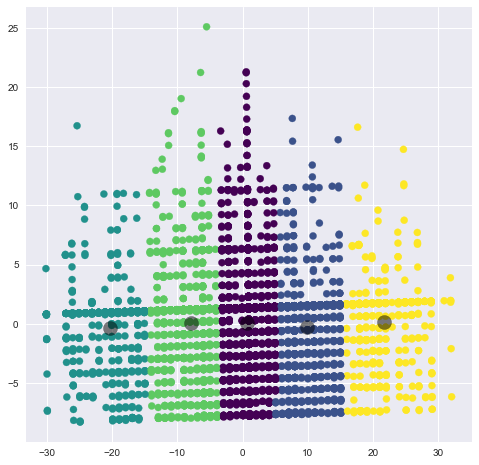

In [85]:
plt.figure(figsize=(8,8))
plt.scatter(df['PCA1'],df['PCA2'],c=y_means,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=.5)
# plt.legend()
# ax=sns.scatterplot('PCA1','PCA2', data=df)

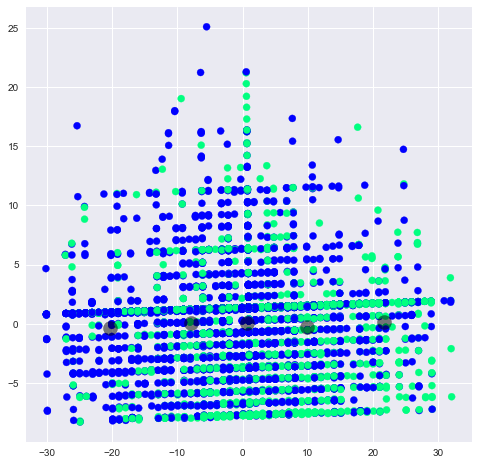

In [86]:
plt.figure(figsize=(8,8))
plt.scatter(df['PCA1'],df['PCA2'],c=df[target_header],s=50,cmap='winter')
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=.5)
# plt.legend()
# ax=sns.scatterplot('PCA1','PCA2', data=df)

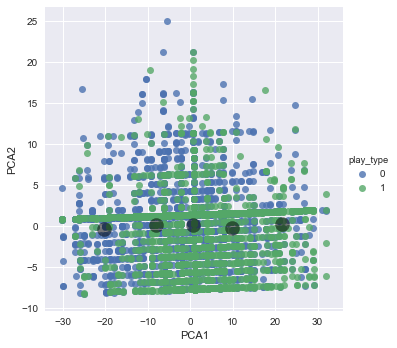

In [87]:
sns.lmplot("PCA1", "PCA2", hue=target_header, data=df, fit_reg=False)
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=.5)

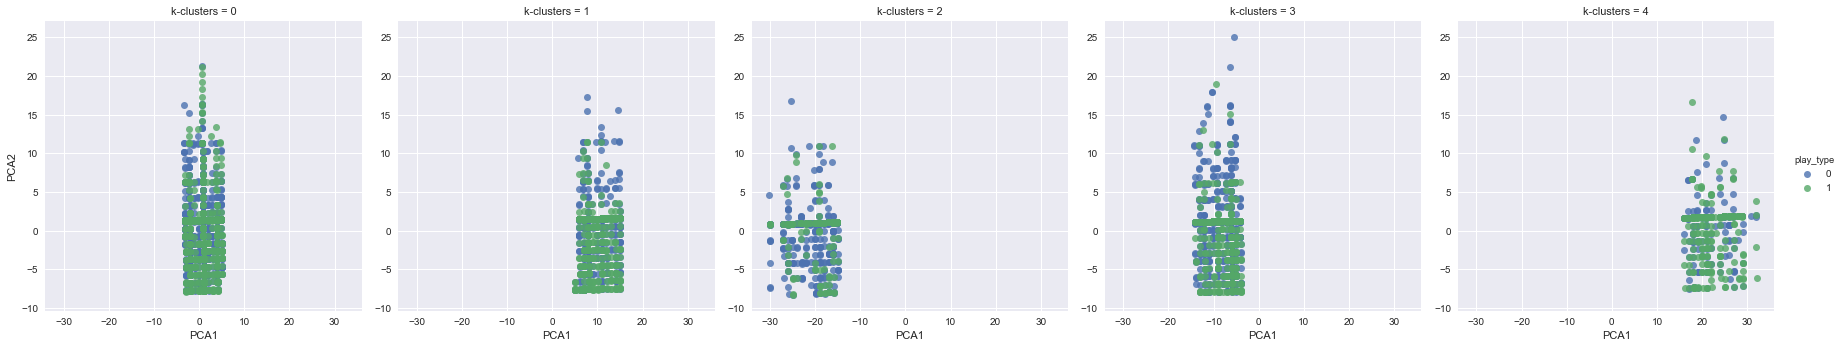

In [88]:
sns.lmplot("PCA1", "PCA2", data=df, hue=target_header,
       col='k-clusters', fit_reg=False);

In [89]:
df.head()

,ydstogo,score_differential_post,down,qtr,play_type,game_half_Half2,game_half_Overtime,PCA1,PCA2,cluster,k-clusters
0,10,0.0,1.0,1,0,0,0,0.941895,1.411113,3,0
1,5,0.0,2.0,1,1,0,0,1.034309,-3.647812,4,0
2,8,0.0,3.0,1,0,0,0,0.977557,-0.729622,4,0
3,10,0.0,1.0,1,1,0,0,0.941895,1.411113,3,0
4,10,0.0,2.0,1,0,0,0,0.941080,1.337885,4,0


## Breakdown of the clusters

### GMM Clusters

In [90]:
headers=df.columns.tolist()
headers[0:-3]
for i in headers[0:-3]:
    print(i,'\n',df.groupby('cluster')[i].agg(['count','mean', 'median','min','max']), '\n')

ydstogo 
          count       mean  median  min  max
cluster                                    
0         2127   7.782793       7    1   30
1         1351  10.000000      10   10   10
2         1587   7.816005       8    1   34
3         1434  10.000000      10   10   10
4          597   7.859296       8    1   25 

score_differential_post 
          count      mean  median   min   max
cluster                                     
0         2127 -1.343677    -1.0 -31.0  31.0
1         1351 -1.242043    -1.0 -31.0  31.0
2         1587 -0.797732     0.0 -22.0  23.0
3         1434 -0.682706     0.0 -24.0  24.0
4          597 -0.018425     0.0  -1.0   1.0 

down 
          count      mean  median  min  max
cluster                                   
0         2127  2.381288     2.0  1.0  4.0
1         1351  1.000000     1.0  1.0  1.0
2         1587  2.305608     2.0  1.0  4.0
3         1434  1.000000     1.0  1.0  1.0
4          597  2.283082     2.0  1.0  4.0 

qtr 
          count      m

In [91]:
gmm_count=df.pivot_table(target_header,index='cluster',columns=None,aggfunc='mean')
gmm_count

,play_type
cluster,
0,0.355900
1,0.537380
2,0.375551
3,0.496513
4,0.395310


In [92]:
df.pivot_table(df,index='cluster',aggfunc='mean')

,PCA1,PCA2,down,game_half_Half2,game_half_Overtime,k-clusters,play_type,qtr,score_differential_post,ydstogo
cluster,,,,,,,,,,
0,-0.376668,-0.933344,2.381288,1,0.000000,1.651622,0.355900,3.544429,-1.343677,7.782793
1,-0.315128,1.380619,1.000000,1,0.000000,1.628423,0.537380,3.518135,-1.242043,10.000000
2,0.180042,-0.878863,2.305608,0,0.000000,1.169502,0.375551,1.730309,-0.797732,7.816005
3,0.256414,1.397104,1.000000,0,0.000000,0.884937,0.496513,1.539749,-0.682706,10.000000
4,0.960615,-0.818570,2.283082,0,0.080402,0.000000,0.395310,1.321608,-0.018425,7.859296


In [93]:
df.pivot_table(df,index=['cluster',target_header],aggfunc='mean')

PCA1      PCA2      down  game_half_Half2  \
cluster play_type                                                  
0       0         -2.804396 -0.313467  2.474453                1   
        1          4.016973 -2.055181  2.212682                1   
1       0         -3.906331  1.313946  1.000000                1   
        1          2.776472  1.438017  1.000000                1   
2       0          0.083806 -0.368253  2.446014                0   
        1          0.340059 -1.727882  2.072148                0   
3       0          0.326714  1.398314  1.000000                0   
        1          0.185126  1.395876  1.000000                0   
4       0          0.950627 -0.368118  2.421053                0   
        1          0.975894 -1.507610  2.072034                0   

                   game_half_Overtime  k-clusters       qtr  \
cluster play_type                                             
0       0                    0.000000    1.649635  3.564234   
        1                    0.000000    1.655218  3.508587   
1       0                    0.000000    1.736000  3.579200   
        1                    0.000000    1.535813  3.465565   
2       0                    0.000000    1.171544  1.756811   
        1                    0.000000    1.166107  1.686242   
3       0                    0.000000    0.947368  1.577562   
        1                    0.000000    0.821629  1.501404   
4       0                    0.094183    0.000000  1.376731   
        1                    0.059322    0.000000  1.237288   

                   score_differential_post    ydstogo  
cluster play_type                                      
0       0                        -3.759124   8.456204  
        1                         3.027741   6.564069  
1       0                        -4.833600  10.000000  
        1                         1.849862  10.000000  
2       0                        -0.883956   8.340061  
        1                        -0.654362   6.944631  
3       0                        -0.612188  10.000000  
        1                        -0.754213  10.000000  
4       0                        -0.019391   8.321330  
        1                        -0.016949   7.152542

In [94]:
df.pivot_table(df,index=['cluster',target_header],aggfunc='median')

PCA1      PCA2  down  game_half_Half2  \
cluster play_type                                              
0       0         -2.113452 -0.626796   2.0                1   
        1          3.096085 -2.622339   2.0                1   
1       0         -4.074965  1.309801   1.0                1   
        1          1.929278  1.423454   1.0                1   
2       0          0.008840 -0.711957   2.0                0   
        1          0.879760 -2.403170   2.0                0   
3       0          0.941895  1.411113   1.0                0   
        1          0.941895  1.411113   1.0                0   
4       0          0.978372 -0.656394   2.0                0   
        1          0.997833 -1.653533   2.0                0   

                   game_half_Overtime  k-clusters  qtr  \
cluster play_type                                        
0       0                           0           2    4   
        1                           0           1    4   
1       0                           0           2    4   
        1                           0           1    3   
2       0                           0           1    2   
        1                           0           1    2   
3       0                           0           0    2   
        1                           0           0    2   
4       0                           0           0    1   
        1                           0           0    1   

                   score_differential_post  ydstogo  
cluster play_type                                    
0       0                             -3.0        8  
        1                              2.0        6  
1       0                             -5.0       10  
        1                              1.0       10  
2       0                             -1.0        8  
        1                              0.0        6  
3       0                              0.0       10  
        1                              0.0       10  
4       0                              0.0        8  
        1                              0.0        7

### K-means clusters

In [95]:
km_count=df.pivot_table(target_header,index='k-clusters',columns=None,aggfunc='count')
km_count

,play_type
k-clusters,
0,3277
1,1233
2,610
3,1519
4,457


C:\Users\Public\Programming\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


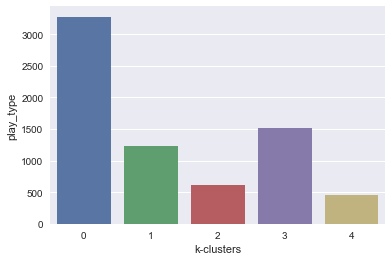

In [96]:
sns.barplot(x=km_count.index, y=target_header, data=km_count)

In [97]:
km_mean=df.pivot_table(target_header,index='k-clusters',columns=None,aggfunc='mean')
km_mean

,play_type
k-clusters,
0,0.443393
1,0.484185
2,0.242623
3,0.369322
4,0.586433


In [98]:
df.pivot_table(df,index=['k-clusters',target_header],aggfunc='mean')

PCA1      PCA2   cluster      down  \
k-clusters play_type                                            
0          0           0.625075  0.272807  2.052632  1.977522   
           1           0.854985 -0.107086  2.108741  1.578114   
1          0           9.946112  0.164204  1.424528  2.001572   
           1           9.849853 -0.680499  1.303183  1.608040   
2          0         -20.407115 -0.363781  0.547619  1.961039   
           1         -20.294165 -0.305471  0.851351  1.587838   
3          0          -8.048670  0.434944  1.262004  1.950939   
           1          -7.712961 -0.583206  1.586453  1.588235   
4          0          21.436430  0.279782  0.555556  2.010582   
           1          21.750806  0.114632  0.522388  1.708955   

                      game_half_Half2  game_half_Overtime       qtr  \
k-clusters play_type                                                  
0          0                 0.332785            0.018640  2.180921   
           1                 0.346869            0.009635  2.118376   
1          0                 0.448113            0.000000  2.496855   
           1                 0.586265            0.000000  2.772194   
2          0                 0.900433            0.000000  3.536797   
           1                 0.837838            0.000000  3.236486   
3          0                 0.542797            0.000000  2.775574   
           1                 0.445633            0.000000  2.442068   
4          0                 0.883598            0.000000  3.375661   
           1                 0.951493            0.000000  3.567164   

                      score_differential_post   ydstogo  
k-clusters play_type                                     
0          0                        -0.328947  8.939693  
           1                        -0.107364  8.525120  
1          0                         8.990566  8.660377  
           1                         8.879397  7.787270  
2          0                       -21.361472  8.694805  
           1                       -21.250000  8.722973  
3          0                        -8.994781  9.263048  
           1                        -8.680927  8.208556  
4          0                        20.486772  8.566138  
           1                        20.798507  8.373134

# EXTRA

In [ ]:
data=df.drop(target_header,axis=1,inplace=False)

num_plot_rows=len(data.columns)


label_encoder = preprocessing.LabelEncoder()
df[target_header]=label_encoder.fit_transform(df[target_header])
labels=label_encoder.classes_   #this is an array
labels=list(labels) #converting the labels array to a list
print (labels)

fig = plt.figure(figsize = (20,num_plot_rows*4))
j = 0

ax=[]
colors=['g','r','b']
for i in data.columns:
    plt.subplot(num_plot_rows, 4, j+1)
    j += 1
    for k in range(len(labels)):
#         print(k)
        a=sns.distplot(data[i][df[target_header]==k], color=colors[k], label = str(labels[k]));
        ax.append(a)
#     sns.distplot(data[i][df[target_header]==0], color='g', label = '0')
#     sns.distplot(data[i][df[target_header]==1], color='r', label = '1')
#     sns.distplot(data[i][df[target_header]==2], color='b', label = '2')
    plt.legend(loc='best')
fig.suptitle(target_header+ 'Data Analysis')
fig.tight_layout()
# fig.subplots_adjust(top=0.95)
plt.show()

In [99]:
df.select_dtypes(include='int64').head()

,ydstogo,qtr,play_type,cluster
0,10,1,0,3
1,5,1,1,4
2,8,1,0,4
3,10,1,1,3
4,10,1,0,4


In [100]:
df['game_seconds_remaining'] = df['game_seconds_remaining'].apply(lambda x: x/3600)

KeyError: 'game_seconds_remaining'

In [ ]:
df.game_seconds_remaining.head()

In [ ]:
pd.get_dummies(df.game_half,prefix='game_half').iloc[:,0:2]


In [ ]:
header

In [ ]:
header.remove('play_type')

In [ ]:
header